## Ensemble Learning

Trog notebook này, chúng ta sẽ so sánh chất lượng của:

- re-sampling
- boosting hoặc bagging
- bagging + resamppling
- boosting + resampling
- bagging + boosting + resampling

Sử dụng các lớp từ sklearn và imblearn trên nhiều tập dữ liệu.

In [29]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)

In [30]:
# phương pháp re-sampling (không có bộ phân loại)

resampling_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False,
    ),

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4,
    ),
}

In [31]:
# phương pháp ensemble (có/không có resampling)

ensemble_dict = {

    # balanced random forest (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # bagging của hồi quy Logistic, không resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=2909,
    ),

    # bagging của hồi quy Logistic với resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        max_samples=1.0,  # Số mẫu cần lấy từ X để huấn luyện từng base estimator
        max_features=1.0,  # Số đặc trưng cần lấy từ X để huấn luyện từng base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # boosting + undersampling
    'rusboost': RUSBoostClassifier(
        base_estimator=None,
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=2909,
    ),

    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),
}

In [32]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

In [33]:
# hàm để huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    ## Yêu cầu 1:
    ## VIẾT CODE Ở ĐÂY:
    rf = RandomForestClassifier(
        n_estimators=20, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = rf.predict_proba(X_train)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số huấn luyện
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = rf.predict_proba(X_test)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số kiểm tra
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    # trả về roc-auc của tập kiểm tra
    return roc_auc_score(y_test, pred[:, 1])

<details><summary> Gợi ý </summary>

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

</details>

In [34]:
# hàm để huấn luyện random forest và đánh giá chất lượng

def run_adaboost(X_train, X_test, y_train, y_test):
    ## Yêu cầu 2:
    ## VIẾT CODE Ở ĐÂY:
    ada = AdaBoostClassifier(n_estimators=20, random_state=2909)
    
    ada.fit(X_train, y_train)

    print('Train set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ada.predict_proba(X_train)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số huấn luyện
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ada.predict_proba(X_test)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số kiểm tra
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    # trả về roc-auc của tập kiểm tra
    return roc_auc_score(y_test, pred[:, 1])

<details><summary> Gợi ý </summary>

[AdaBoostClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

</details>

In [37]:
# hàm để huấn luyện random forest và đánh giá chất lượng ensemble

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)

    ## Yêu cầu 3:
    ## VIẾT CODE Ở ĐÂY:

    print('Train set')
    
    
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ensemble.predict_proba(X_train)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số huấn luyện
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ensemble.predict_proba(X_test)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số kiểm tra
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    # trả về roc-auc của tập kiểm tra
    return roc_auc_score(y_test, pred[:, 1])

In [49]:
# lưu kết quả
results_dict = {}

## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:

for dataset in datasets_ls:
    
    results_dict[dataset] = {}    
    print(dataset)
    
    # load tập dữ liệu
    data = fetch_datasets()[dataset]
    
    # tách thành tập huấn luyện và kiểm tra (sử dụng 'train_test_split')
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # đặt các biến trong cùng một tỷ lệ
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # huấn luyện mô hình và lưu trữ kết quả 
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data'] = roc
    print()
    
    # huấn luyện mô hình và lưu trữ kết quả
    roc = run_adaboost(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data_adaboost'] = roc
    print()
    
    for sampler in resampling_dict.keys():
        
        print(sampler)
        
        # resample
        X_resampled, y_resampled = resampling_dict[sampler].fit_resample(X_train, y_train)
        
        # huấn luyện mô hình và lưu trữ kết quả
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        results_dict[dataset]['full_data'] = roc
        print()
    
    for ensemble in ensemble_dict.keys():
        
        print(ensemble)
        
        # huấn luyện mô hình và lưu trữ kết quả
        roc = run_ensemble(ensemble_dict['easyEnsemble'], X_train, X_test, y_train, y_test)
        results_dict[dataset]['full_data'] = roc
        print()
        

car_eval_34
Train set
Random Forests roc-auc: 0.9513383050063591
Test set
Random Forests roc-auc: 0.9351974691295031

Train set
AdaBoost roc-auc: 0.9987040891047134
Test set
AdaBoost roc-auc: 0.9961985916930298

random
Train set
Random Forests roc-auc: 0.9808648398658805
Test set
Random Forests roc-auc: 0.9641289927543627

smote
Train set
Random Forests roc-auc: 0.9780148796906515
Test set
Random Forests roc-auc: 0.9577507908970303

balancedRF


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
ensembleBoost roc-auc: 0.9983813157590472
Test set
ensembleBoost roc-auc: 0.9955607715072967

bagging
Train set
ensembleBoost roc-auc: 0.9983813157590472
Test set
ensembleBoost roc-auc: 0.9955607715072967

balancedbagging
Train set
ensembleBoost roc-auc: 0.9983813157590472
Test set
ensembleBoost roc-auc: 0.9955607715072967

rusboost
Train set
ensembleBoost roc-auc: 0.9983813157590472
Test set
ensembleBoost roc-auc: 0.9955607715072967

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9983813157590472
Test set
ensembleBoost roc-auc: 0.9955607715072967

ecoli
Train set
Random Forests roc-auc: 0.9612624217887376
Test set
Random Forests roc-auc: 0.928743961352657

Train set
AdaBoost roc-auc: 0.9929149797570851
Test set
AdaBoost roc-auc: 0.9402173913043478

random
Train set
Random Forests roc-auc: 0.9674556213017752
Test set
Random Forests roc-auc: 0.9359903381642511

smote
Train set
Random Forests roc-auc: 0.9749662324580481
Test set
Random Forests roc-auc: 0.9577294685990339

bala

C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
ensembleBoost roc-auc: 0.9898785425101214
Test set
ensembleBoost roc-auc: 0.9685990338164252

bagging
Train set
ensembleBoost roc-auc: 0.9898785425101214
Test set
ensembleBoost roc-auc: 0.9685990338164252

balancedbagging
Train set
ensembleBoost roc-auc: 0.9898785425101214
Test set
ensembleBoost roc-auc: 0.9685990338164252

rusboost
Train set
ensembleBoost roc-auc: 0.9898785425101214
Test set
ensembleBoost roc-auc: 0.9685990338164252

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9898785425101214
Test set
ensembleBoost roc-auc: 0.9685990338164252

thyroid_sick
Train set
Random Forests roc-auc: 0.9659770036881864
Test set
Random Forests roc-auc: 0.9488890256662768

Train set
AdaBoost roc-auc: 0.9909388680506942
Test set
AdaBoost roc-auc: 0.9634086292854065

random
Train set
Random Forests roc-auc: 0.9752698600101198
Test set
Random Forests roc-auc: 0.9449252169631316

smote
Train set
Random Forests roc-auc: 0.958279397611338
Test set
Random Forests roc-auc: 0.943989659629469

C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
ensembleBoost roc-auc: 0.9879089132910532
Test set
ensembleBoost roc-auc: 0.9626269465132024

bagging
Train set
ensembleBoost roc-auc: 0.9879089132910532
Test set
ensembleBoost roc-auc: 0.9626269465132024

balancedbagging
Train set
ensembleBoost roc-auc: 0.9879089132910532
Test set
ensembleBoost roc-auc: 0.9626269465132024

rusboost
Train set
ensembleBoost roc-auc: 0.9879089132910532
Test set
ensembleBoost roc-auc: 0.9626269465132024

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9879089132910532
Test set
ensembleBoost roc-auc: 0.9626269465132024

arrhythmia
Train set
Random Forests roc-auc: 0.9704898681880779
Test set
Random Forests roc-auc: 0.62255859375

Train set
AdaBoost roc-auc: 1.0
Test set
AdaBoost roc-auc: 0.9775390625

random
Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.8857421875

smote
Train set
Random Forests roc-auc: 0.9949664992561604
Test set
Random Forests roc-auc: 0.876953125

balancedRF


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
ensembleBoost roc-auc: 1.0
Test set
ensembleBoost roc-auc: 1.0

bagging
Train set
ensembleBoost roc-auc: 1.0
Test set
ensembleBoost roc-auc: 1.0

balancedbagging
Train set
ensembleBoost roc-auc: 1.0
Test set
ensembleBoost roc-auc: 1.0

rusboost
Train set
ensembleBoost roc-auc: 1.0
Test set
ensembleBoost roc-auc: 1.0

easyEnsemble
Train set
ensembleBoost roc-auc: 1.0
Test set
ensembleBoost roc-auc: 1.0

ozone_level
Train set
Random Forests roc-auc: 0.9231215679271396
Test set
Random Forests roc-auc: 0.8408622908622909

Train set
AdaBoost roc-auc: 0.9904292602348319
Test set
AdaBoost roc-auc: 0.8387065637065637

random
Train set
Random Forests roc-auc: 0.9534023668639053
Test set
Random Forests roc-auc: 0.8100707850707851

smote
Train set
Random Forests roc-auc: 0.95301945714816
Test set
Random Forests roc-auc: 0.8222329472329473

balancedRF


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
ensembleBoost roc-auc: 0.9904906469038797
Test set
ensembleBoost roc-auc: 0.8588159588159588

bagging
Train set
ensembleBoost roc-auc: 0.9904906469038797
Test set
ensembleBoost roc-auc: 0.8588159588159588

balancedbagging
Train set
ensembleBoost roc-auc: 0.9904906469038797
Test set
ensembleBoost roc-auc: 0.8588159588159588

rusboost
Train set
ensembleBoost roc-auc: 0.9904906469038797
Test set
ensembleBoost roc-auc: 0.8588159588159588

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9904906469038797
Test set
ensembleBoost roc-auc: 0.8588159588159588



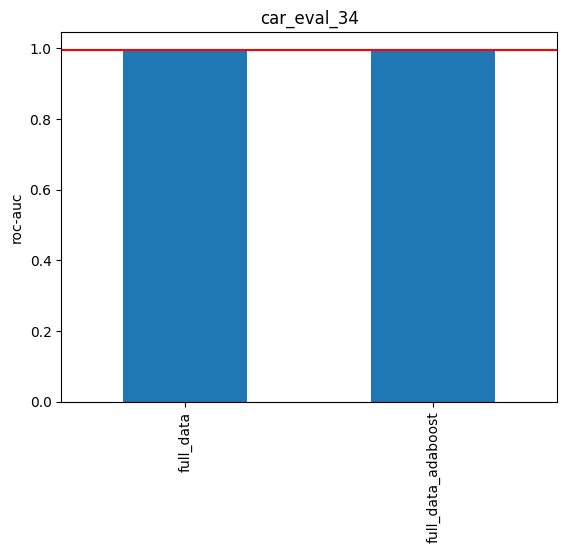

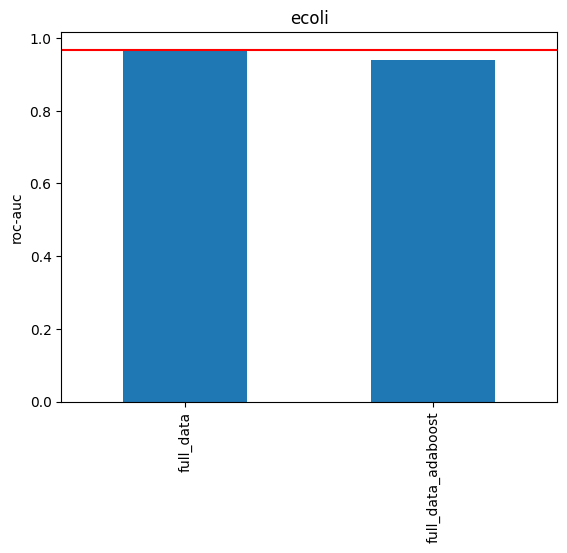

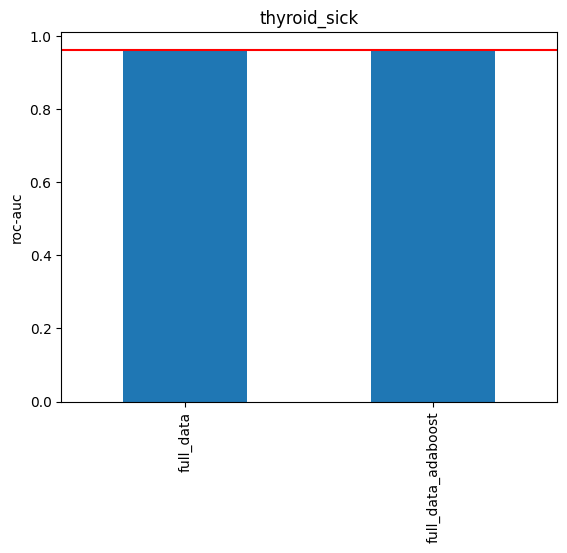

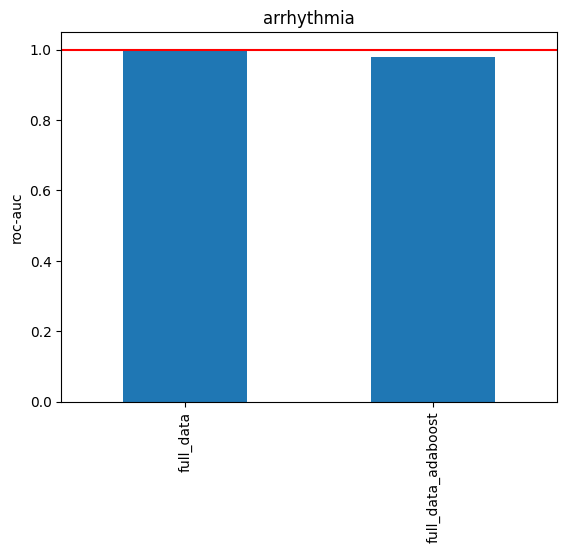

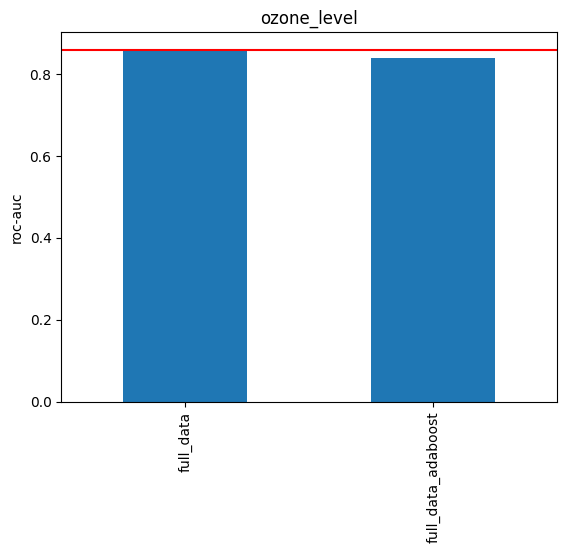

In [50]:
for dataset in datasets_ls:
    ## Yêu cầu 5:
    ## VIẾT CODE Ở ĐÂY:
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

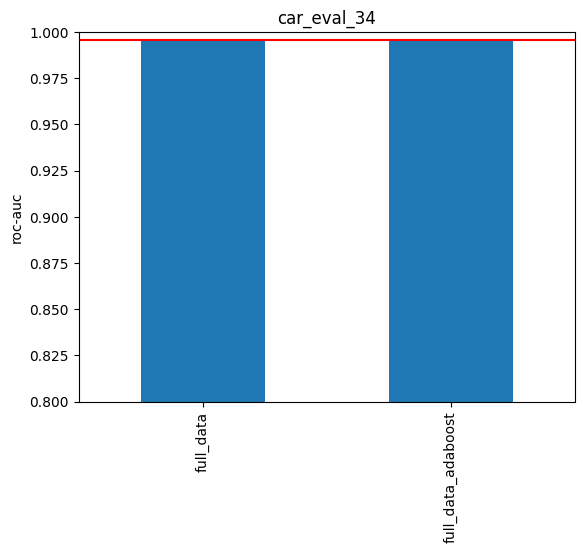

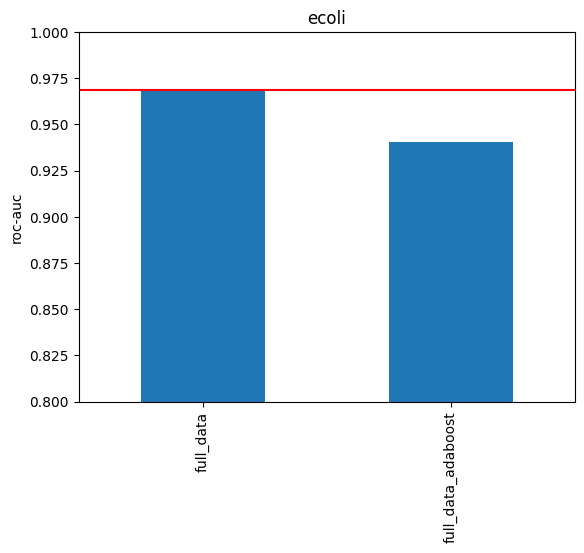

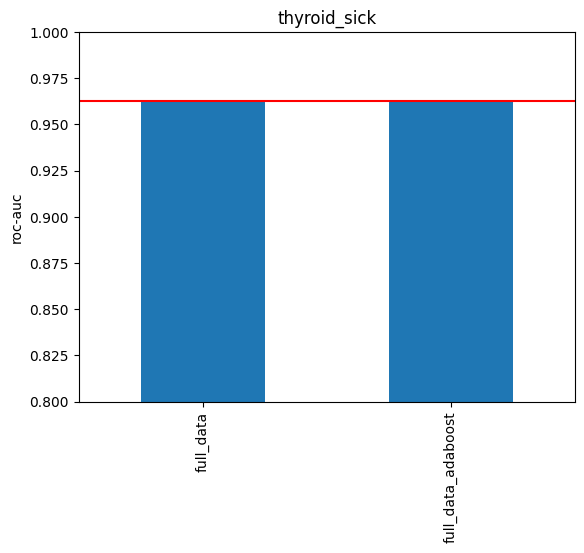

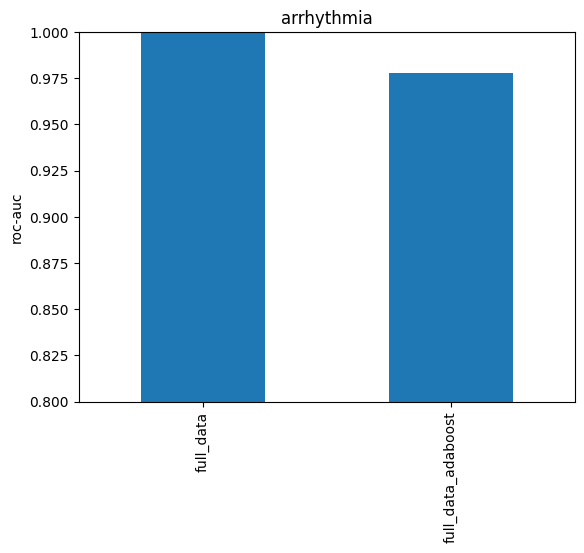

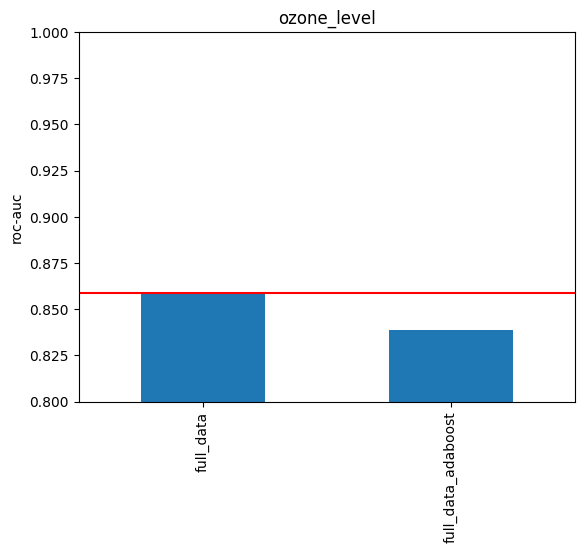

In [51]:
for dataset in datasets_ls:
    ## Yêu cầu 5:
    ## VIẾT CODE Ở ĐÂY:
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

Chúng ta thấy rằng thuật toán boosting có hướng hoạt động tốt hơn thuật toán bagging, và kết hợp resampling với bagging nhìn chung có cải thiện chất lượng một chút.

Lưu ý rằng tôi đang so sánh các mô hình chuẩn cho từng ensemble. Nếu chúng ta dành chút thời gian để tối ưu hóa các tham số thì chắc chắn chúng ta sẽ nhận được các mô hình tốt hơn với từng triển khai này. Hãy coi đó là bài tập của các bạn.
